<a href="https://colab.research.google.com/github/SeongminOh242/CS1632_Fall2024/blob/main/HW5_MLP_vs_CNN_for_CFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.
#### Modified by Eugene Agichtein for Emory CS325 and cs557

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Convolutional Neural Network (CNN)

### Import TensorFlow

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import datetime
import platform
from sklearn.model_selection import train_test_split

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [ ]:
(train_images_all, train_labels_all), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images_all, test_images = train_images_all / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


**Important**: We always train and optimize models on the "train" split of the data; validate performance of particular setting/structure/parameter value on the "validation" split of the data; and do final evaluation on the "test" set of the data.

This helps predict how well a model would generalize to unseen (new) datasets, since all the training and optimization happens without seeing the "test" data.

In [ ]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images_all, train_labels_all, train_size=40000, test_size=10000, random_state=42)
print("train_images:", train_images.shape)
print("train_labels:", train_labels.shape)
print("val_images:", val_images.shape)
print("val_labels:", val_labels.shape)
print('test_images:', test_images.shape)
print('y_test:', test_labels.shape)



train_images: (40000, 32, 32, 3)
train_labels: (40000, 1)
val_images: (10000, 32, 32, 3)
val_labels: (10000, 1)
test_images: (10000, 32, 32, 3)
y_test: (10000, 1)


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


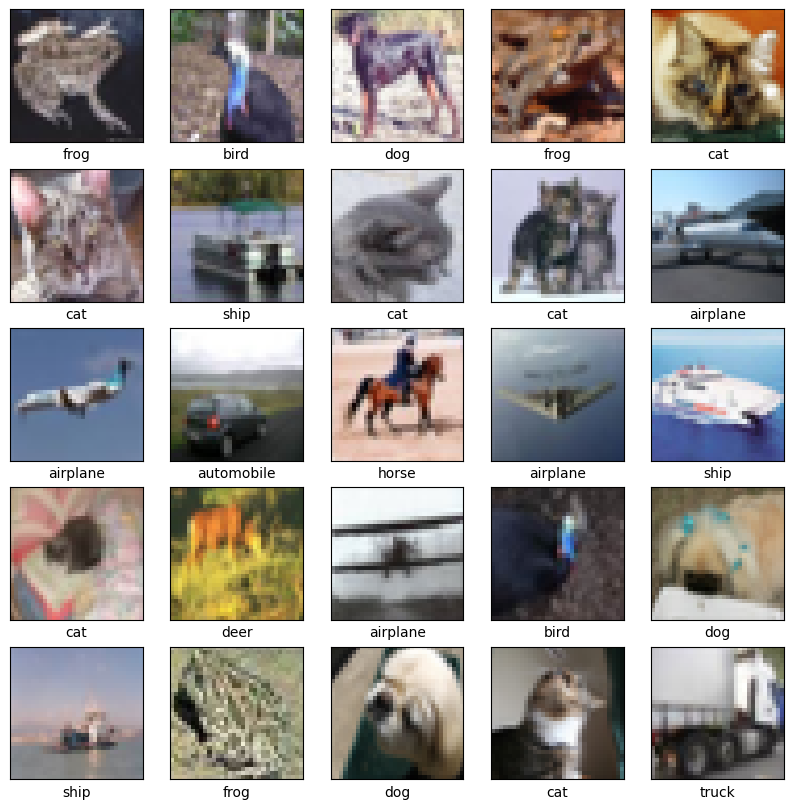

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Part 1: Define the MLP model

In [ ]:
mlp_model = models.Sequential()

# Input layers
mlp_model.add(tf.keras.layers.Flatten(input_shape=train_images.shape[1:]))

mlp_model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Output layers.
mlp_model.add(layers.Dense(units=10,
                           activation=tf.keras.activations.softmax))

model = mlp_model



/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Let's display the architecture of your model:

#Part 2: Define CNN Model
Main part of the assignment


In [ ]:
cnn_model = models.Sequential()
num_classes = 10
#*** YOUR CODE HERE ****

#add input layers if necessary

#add convolutional layers and pooling layers as needed


#add dense layers to combine shape/filter features

#add output layer for predictions


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Part 3/extra: define Minimal cnn model

In [ ]:
cnn_minimal = model.Sequential()
#your code here
cnn_minimal.summary()

#Choose model to train
set model to either mlp_model or cnn_model to train, make sure to save the main results and best hyperparameter settings in a text cell, and also in the "report" section below.

In [ ]:
model = cnn_model

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 502,688 (1.92 MB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 335,126 (1.28 MB)

### Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(val_images, val_labels))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7085 - loss: 0.9663 - val_accuracy: 0.6618 - val_loss: 1.0980
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7214 - loss: 0.9274 - val_accuracy: 0.6539 - val_loss: 1.1192
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7285 - loss: 0.9104 - val_accuracy: 0.6699 - val_loss: 1.0712
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7390 - loss: 0.8884 - val_accuracy: 0.6900 - val_loss: 1.0207
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7488 - loss: 0.8670 - val_accuracy: 0.6848 - val_loss: 1.0467
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7530 - loss: 0.8470 - val_accuracy: 0.6936 - val_loss: 1.0356
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7573 - loss: 0.8393 - val_accuracy: 0.7027 - val_loss: 1.0093
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7638 - loss: 0.8198 - 

### Evaluate the model

313/313 - 1s - 2ms/step - accuracy: 0.6934 - loss: 1.0472


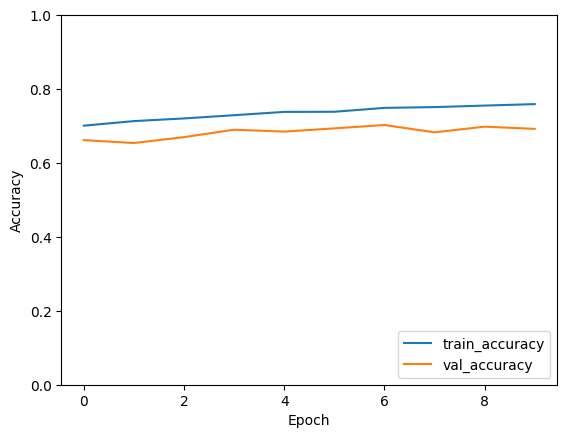

In [ ]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.6934000253677368


#Lets visualize the results

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_147
Received: inputs=('Tensor(shape=(32, 32, 32, 3))',)
  warnings.warn(msg)


279/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_147
Received: inputs=('Tensor(shape=(None, 32, 32, 3))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test accuracy:  0.6934


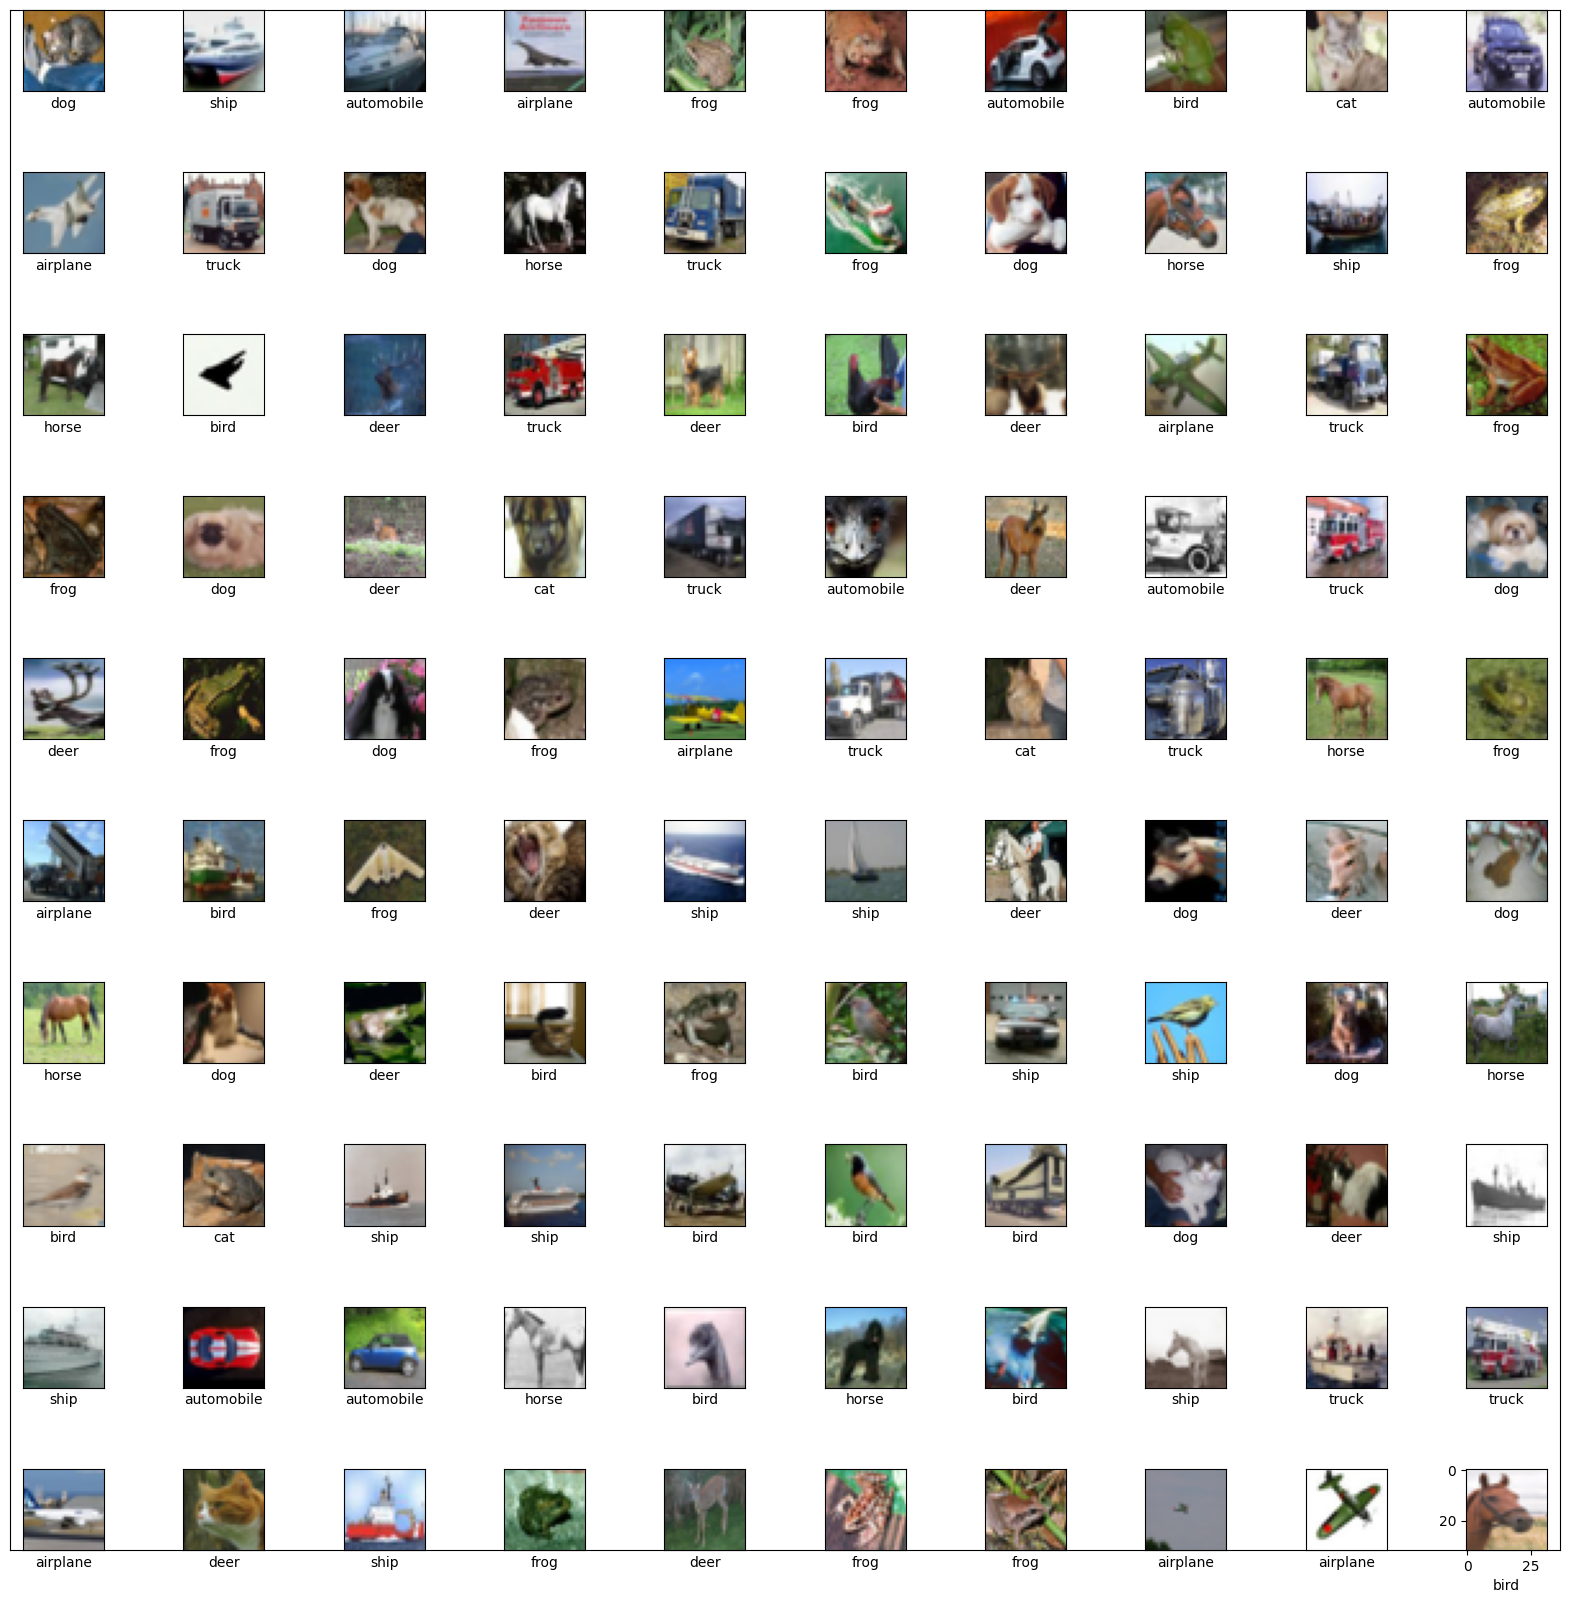

In [ ]:
from sklearn.metrics import accuracy_score

predictions_one_hot = model.predict([test_images])
pd.DataFrame(predictions_one_hot)
predictions = np.argmax(predictions_one_hot, axis=1)
test_accuracy = accuracy_score(test_labels, predictions)
print('Test accuracy: ', test_accuracy)

images_to_display = 100
num_cells = math.ceil(math.sqrt(images_to_display))
plt.figure(figsize=(20, 20))

for plot_index in range(images_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == test_labels[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(test_images[plot_index], cmap=color_map)
    predicted_text = class_names[predicted_label]
    plt.xlabel(predicted_text)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()


For equal number of training epochs (e.g., <=10):
Your  MLP should achieve test accuracy of over 44%. Keep modifiying the model structure or hyperparameters until it does :)

Your CNN test accuracy should be >= 0.7 (yes much higher than MLP)

#** YOUR RESULTS ** HERE

##Best Model Structure:
*** your answer here:

##Test accuracy of Baseline model vs. your Best model:
* Baseline MLP model: Test Accuracy: ?  
* Improved MLP model: test accuracy = ?
* Default CNN model: Test Accuracy: ?
* Minimal Network (smallest # total parameters):
   + Number of parameters:
   + Test accuracy: